In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn import preprocessing,linear_model

import matplotlib.pyplot as plt
import random
import numpy as np
import os
import pandas as pd

In [5]:
bmw = pd.read_csv('/Users/duorouli/Downloads/bmw.csv')

bmw.head


In [11]:
X = bmw.iloc[:,0:7]
y = bmw.iloc[:,7]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 200,test_size = 0.2)
std_scale = preprocessing.StandardScaler()
std_scale.fit(X_train)
X_train_sd = std_scale.transform(X_train)
X_test_sd = std_scale.transform(X_test)

In [18]:
clf = KNeighborsClassifier(n_neighbors = 20,metric = 'euclidean')
clf.fit(X_train_sd,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [19]:
predict_probabilities = clf.predict_proba(X_test_sd)[:,1]

In [25]:
cost_matrix = np.array([[0, 1000], [100, -5000]])
y_pred = clf.predict(X_test_sd)

In [32]:
tpr,fpr,thresholds = roc_curve(y_test,predict_probabilities)

In [34]:
clf = confusion_matrix(y_test,y_pred)

In [62]:
thresholds = np.linspace(0, 1.0, num=21)

In [63]:
Cost_List = [0]*len(thresholds)
index = 0
for t in thresholds:
    predict_thre = np.where(predict_probabilities > t,1,0)
    clf = confusion_matrix(y_test,predict_thre)
    Cost_List[index] = clf[0][0]*cost_matrix[0]
    [0]+clf[0][1]*cost_matrix[0][1]+clf[1]
    [0]*cost_matrix[1][0]+clf[1][1]*cost_matrix[1][1]
    index += 1
    

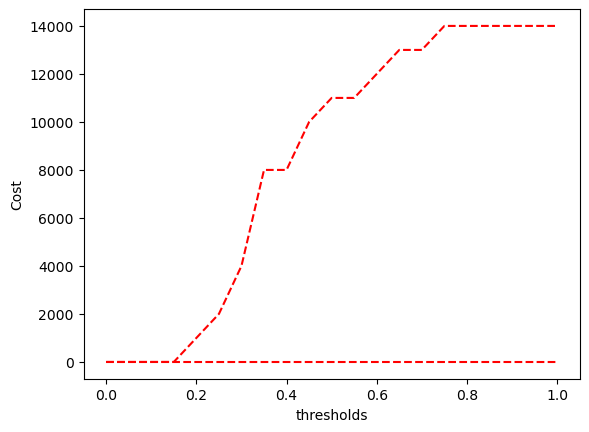

In [64]:
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")
plt.show()
